To note:

- No idea what b is 
- Below is a couple of definitions from the GitHub page which might come in handy

Link travel time = free flow time * ( 1 + B * (flow/capacity)^Power ).
Link generalized cost = Link travel time + toll_factor * toll + distance_factor * distance

# Setup: import packages

In [1]:
#install packages if required
#%pip install networkx

In [2]:
#import packages 
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import graphviz
import scipy.integrate as integrate 
from scipy.optimize import minimize_scalar
from scipy.misc import derivative
import numpy as np
import os
from random import *

In [3]:
#create cities dictionary
def make_dict(cities):
    cities_dict = {}
    for city in cities:
        link_file_path = data_path + city + '/' + city + '_net.tntp.txt'
        node_file_path = data_path + city + '/' + city +'_nodes.tntp.txt'
        trip_file_path = data_path + city + '/' + city + '_trips.tntp.txt'
        cities_dict[city] = {}
        to_add = {'link_file_path': link_file_path, 'node_file_path': node_file_path, 'trip_file_path': trip_file_path}
        cities_dict[city]['file_paths'] = to_add 
    return cities_dict

# Set file paths and city

In [4]:
data_path = '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/'
cities = ['Berlin-Mitte-Center']
data_path = data_path 
os.chdir(data_path)

# Import required classes

In [5]:
classes_path = '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Code/Python/working_multiple_eq_flow/Berlin/pytrans_working_multiple_eq_flow'
#network_analysis_path_niamh = r'C:\Users\35387\OneDrive\Documents\Networks\New folder\Networks_Term_Paper\pytrans_UrbanNetworkAnalysis\pytrans\UrbanNetworkAnalysis\original_edited'
os.chdir(classes_path)
import Frank_Wolfe
import TransportationNetworks as tn
import visualize_graph
import custom_class

# Make dict

In [6]:
cities_dict = make_dict(cities)
cities_dict

{'Berlin-Mitte-Center': {'file_paths': {'link_file_path': '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/Berlin-Mitte-Center/Berlin-Mitte-Center_net.tntp.txt',
   'node_file_path': '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/Berlin-Mitte-Center/Berlin-Mitte-Center_nodes.tntp.txt',
   'trip_file_path': '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/Berlin-Mitte-Center/Berlin-Mitte-Center_trips.tntp.txt'}}}

# instantiate class

In [7]:
#instantiate class 
trial_run = custom_class.fw_custom_algorithm(cities_dict)

# Observe one city

In [8]:
#set city for investigation
city = cities[0]

In [17]:
trial_run.create_links_csv()
cities_dict[city]['csv']

,init_node,term_node,capacity,length,free_flow_time,b,power,speed,toll,link_type
0,1,303,999999.0,0.0,0.000000,0.0,4.0,0.0,0.0,0
1,1,304,999999.0,0.0,0.000000,0.0,4.0,0.0,0.0,0
2,1,306,999999.0,0.0,0.000000,0.0,4.0,0.0,0.0,0
3,1,307,999999.0,0.0,0.000000,0.0,4.0,0.0,0.0,0
4,2,253,999999.0,0.0,0.000000,0.0,4.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
866,395,111,900.0,277.0,15.666667,1.0,4.0,0.0,0.0,1
867,397,249,900.0,70.0,3.000000,1.0,4.0,0.0,0.0,1
868,397,256,900.0,102.0,7.000000,1.0,4.0,0.0,0.0,1
869,398,13,999999.0,0.0,0.000000,0.0,4.0,0.0,0.0,0


# Plot graph

Total number of nodes in Berlin-Mitte-Center: 397
Total number of edges in Berlin-Mitte-Center: 871
Graph for: Berlin-Mitte-Center


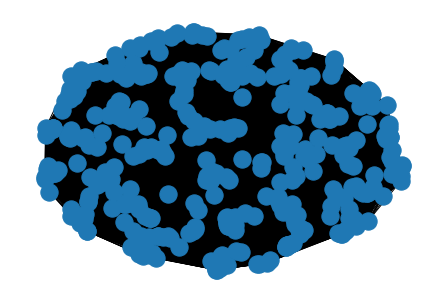

In [10]:
#Create csvs, plot graph and show summary stats
trial_run.summary_stats_all()
trial_run.plot(city)

# Observe example network data

In [11]:
#observe network with all links
remove_link = None #0 is equivalent to no links closed
trial_run.make_network(city, remove_link)
trial_run.network_attributes(city, remove_link)

No links removed
Berlin-Mitte-Center graph is: DiGraph with 397 nodes and 871 edges
Berlin-Mitte-Center origin nodes are: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36']
Berlin-Mitte-Center flows are: {('1', '2'): 14.31, ('1', '3'): 12.306, ('1', '4'): 24.582, ('1', '5'): 18.504, ('1', '6'): 29.298, ('1', '7'): 64.134, ('1', '8'): 46.788, ('1', '9'): 59.736, ('1', '10'): 8.274, ('1', '11'): 3.612, ('1', '12'): 6.888, ('1', '13'): 3.132, ('1', '14'): 3.468, ('1', '15'): 16.512, ('1', '16'): 18.618, ('1', '17'): 20.232, ('1', '18'): 40.56, ('1', '19'): 21.144, ('1', '20'): 9.642, ('1', '21'): 15.996, ('1', '22'): 8.952, ('1', '23'): 12.276, ('1', '24'): 4.998, ('1', '25'): 10.542, ('1', '26'): 11.166, ('1', '27'): 9.732, ('1', '28'): 4.308, ('1', '29'): 33.204, ('1', '30'): 19.47, ('1', '31'): 28.032, ('1', '32'): 28.674, ('1', '3

In [12]:
#observe network after removing one link
remove_link = 0
trial_run.make_network(city, remove_link)
trial_run.network_attributes(city, remove_link)

Berlin-Mitte-Center graph is: DiGraph with 397 nodes and 870 edges
Berlin-Mitte-Center origin nodes are: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36']
Berlin-Mitte-Center flows are: {('1', '2'): 14.31, ('1', '3'): 12.306, ('1', '4'): 24.582, ('1', '5'): 18.504, ('1', '6'): 29.298, ('1', '7'): 64.134, ('1', '8'): 46.788, ('1', '9'): 59.736, ('1', '10'): 8.274, ('1', '11'): 3.612, ('1', '12'): 6.888, ('1', '13'): 3.132, ('1', '14'): 3.468, ('1', '15'): 16.512, ('1', '16'): 18.618, ('1', '17'): 20.232, ('1', '18'): 40.56, ('1', '19'): 21.144, ('1', '20'): 9.642, ('1', '21'): 15.996, ('1', '22'): 8.952, ('1', '23'): 12.276, ('1', '24'): 4.998, ('1', '25'): 10.542, ('1', '26'): 11.166, ('1', '27'): 9.732, ('1', '28'): 4.308, ('1', '29'): 33.204, ('1', '30'): 19.47, ('1', '31'): 28.032, ('1', '32'): 28.674, ('1', '33'): 10.908, ('1'

# Compute equilibrium flow for example city using Frank-Wolfe algorithm

In [13]:
%%time

#compute the eq flow for one example city and no closed links
remove_link = None
trial_run.compute_link_flow(city, remove_link)

CPU times: user 10min 1s, sys: 13.2 s, total: 10min 14s
Wall time: 10min 34s


Results for: Berlin-Mitte-Center
1  ->  303 :  0.0
1  ->  304 :  659.43
1  ->  306 :  0.0
1  ->  307 :  0.0
303  ->  1 :  0.0
303  ->  304 :  0.0
304  ->  1 :  0.0
304  ->  307 :  0.0
304  ->  308 :  430.48675020315994
304  ->  310 :  228.94324979684012
306  ->  1 :  695.424
306  ->  303 :  0.0
307  ->  1 :  0.0
307  ->  311 :  0.0
2  ->  253 :  429.2797775254456
2  ->  255 :  499.04682802749994
2  ->  256 :  280.63053803751586
2  ->  272 :  0.0
253  ->  2 :  352.01761349648905
253  ->  81 :  0.005652149262290275
253  ->  258 :  429.27930777114034
253  ->  272 :  0.0
253  ->  353 :  0.0035369871512690837
255  ->  2 :  736.7881736535347
255  ->  5 :  913.8068923284309
255  ->  253 :  0.0017440608198160614
256  ->  2 :  118.38735644043916
256  ->  272 :  0.0
256  ->  397 :  280.63053803751586
272  ->  2 :  0.0
272  ->  253 :  0.0
272  ->  256 :  0.0
3  ->  258 :  352.0188398594827
3  ->  259 :  0.0
3  ->  260 :  0.002567513840207644
3  ->  261 :  421.8085057480712
258  ->  3 :  429.27930

35  ->  149 :  0.005711848165658073
35  ->  150 :  297.36028815183397
147  ->  35 :  0.0
147  ->  149 :  0.0
148  ->  35 :  0.0
148  ->  149 :  0.0
149  ->  35 :  0.0
149  ->  147 :  0.0
149  ->  153 :  0.005711848165658073
150  ->  35 :  317.7360000000001
150  ->  147 :  0.0
150  ->  153 :  350.91836648819736
36  ->  240 :  491.6160151273131
36  ->  247 :  0.0
36  ->  268 :  402.0225612333793
36  ->  354 :  0.004779830730261751
247  ->  36 :  0.0
247  ->  242 :  0.0012050419567829738
247  ->  267 :  0.0014387666209333047
247  ->  269 :  0.0
354  ->  36 :  0.00467748975305985
354  ->  244 :  0.004779830730261751
354  ->  355 :  0.0
37  ->  38 :  0.0
37  ->  375 :  0.0
38  ->  37 :  0.0
41  ->  101 :  0.0
41  ->  113 :  0.0
101  ->  103 :  0.0
101  ->  392 :  0.0
113  ->  42 :  0.0
113  ->  114 :  184.77386110708383
113  ->  125 :  0.011192046146433413
42  ->  41 :  0.0
44  ->  46 :  146.6840736112819
44  ->  47 :  304.0669180438127
47  ->  66 :  304.0669180438127
45  ->  46 :  367.8546

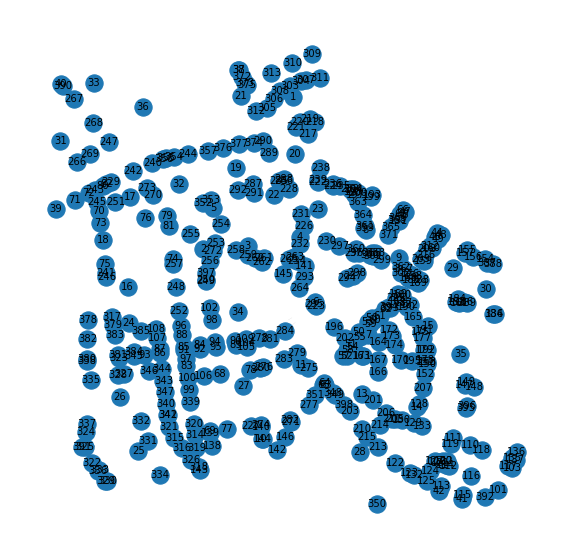

In [14]:
#report eq flow for one example city and no closed links
print('Results for:', city)
trial_run.cities_dict[city][str(remove_link)]['fw_run'].showODFlow() #equilibrium flows
trial_run.cities_dict[city][str(remove_link)]['fw_run'].showODFlowMap() #flow map

# Systematically close each link and compute equilibrium flow for example city

In [ ]:
#need to make the network where each link is shut first
trial_run.make_network_shut_each_link(city)

In [ ]:
check = list(cities_dict[city].keys())
check.remove('file_paths')
check.remove('csv')
print(check)
for i in check:
    if cities_dict[city]['csv'].shape[0] <= len(cities_dict[city][i]['network'].graph.edges):
        print(True)
#should only print one True i.e. only one full network - 'None'

In [ ]:
%%time

trial_run.eq_flow_shut_each_link(city)

In [ ]:
#report eq flow for one example city and one randomly closed link (flex removed_link, but can't choose more than max edges)
max_edges = len(cities_dict[city]['0']['network'].graph.edges)
print('max_edges:', max_edges)
removed_link = 1
print('Equilibrium flow for removed link number',removed_link, 'in', city)
print('Results for:', city)
trial_run.cities_dict[city][str(removed_link)]['fw_run'].showODFlow() #equilibrium flows
trial_run.cities_dict[city][str(removed_link)]['fw_run'].showODFlowMap() #flow map

# Save file

In [ ]:
save_path = '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Code/Python/working_multiple_eq_flow/results/'
Berlin_Mitte_Center = cities_dict
with open('Berlin_Mitte_Center.pickle', 'wb') as handle:
    pickle.dump(Berlin_Mitte_Center, handle, protocol=pickle.HIGHEST_PROTOCOL)
    